In [1]:
import ipywidgets as widgets
import os

from libs.utils import *
from libs.ct import CT, draw_emitters_detectors

import matplotlib.pyplot as plt

from libs.dicom import *

# Detector/Emitter Visualizer

In [8]:
img = cv2.imread('./photos/Shepp_logan.jpg', cv2.IMREAD_GRAYSCALE)
padded_image = pad_image(img, 50)

xs = widgets.interact(draw_emitters_detectors, image=widgets.fixed(padded_image), alpha=(0, 360, 10), angle_range=(45, 180, 5), detectors=(5, 180, 5))

interactive(children=(IntSlider(value=180, description='alpha', max=360, step=10), IntSlider(value=110, descri…

# Normal photos

In [2]:
filename_path = './photos/'
fileNames = os.listdir(filename_path)

filename_widget = widgets.Select(options=fileNames)
angle_range_widget = widgets.IntSlider(value=180, min=0, max=360, step=5, description='Angle Range:')
n_scans_widget = widgets.IntSlider(value=180, min=0, max=1000, step=10, description='Number of Scans:')
n_detectors_widget = widgets.IntSlider(value=180, min=0, max=720, step=5, description='Number of Detectors:')

def get_values(change):
    global FILENAME, ANGLE_RANGE, N_SCANS, N_DETECTORS
    if change['owner'] == filename_widget:
        FILENAME = change['new']
    elif change['owner'] == angle_range_widget:
        ANGLE_RANGE = change['new']
    elif change['owner'] == n_scans_widget:
        N_SCANS = change['new']
    elif change['owner'] == n_detectors_widget:
        N_DETECTORS = change['new']

FILENAME, ANGLE_RANGE, N_SCANS, N_DETECTORS = 'CT_ScoutView.jpg', 180, 180, 180

filename_widget.observe(get_values, names='value')
angle_range_widget.observe(get_values, names='value')
n_scans_widget.observe(get_values, names='value')
n_detectors_widget.observe(get_values, names='value')

display(filename_widget, angle_range_widget, n_scans_widget, n_detectors_widget)

Select(options=('CT_ScoutView-large.jpg', 'CT_ScoutView.jpg', 'Kolo.jpg', 'Kropka.jpg', 'Kwadraty2.jpg', 'Pask…

IntSlider(value=180, description='Angle Range:', max=360, step=5)

IntSlider(value=180, description='Number of Scans:', max=1000, step=10)

IntSlider(value=180, description='Number of Detectors:', max=720, step=5)

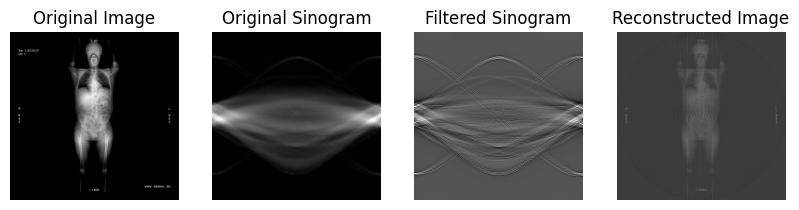

In [4]:
_, _ = CT(cv2.imread(filename_path + FILENAME, cv2.IMREAD_GRAYSCALE), ANGLE_RANGE, N_SCANS, N_DETECTORS, filter=True, visualize=True, mask=False).scan()

# DICOM

In [3]:
dicom_path = './dcm/'
dicom_fileNames = os.listdir(dicom_path)
dicom_filename_widget = widgets.Select(options=dicom_fileNames)

def get_dcom_filename(change):
    global DCOM_FILENAME
    if change['owner'] == filename_widget:
        DCOM_FILENAME = change['new']

#default value
DCOM_FILENAME = 'CT_ScoutView.dcm'

dicom_filename_widget = widgets.Select(options=dicom_fileNames)
dicom_filename_widget.observe(get_dcom_filename, names='value')
display(dicom_filename_widget)

Select(options=('CT_ScoutView-large.dcm', 'CT_ScoutView.dcm', 'Kolo.dcm', 'Kropka.dcm', 'Kwadraty2.dcm', 'Pask…

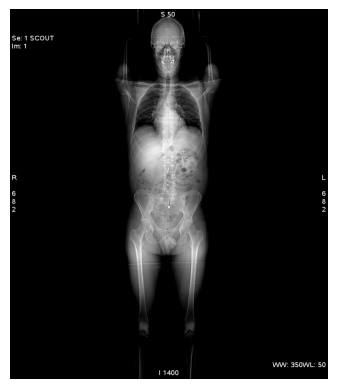

In [4]:
dcm = read_dicom(dicom_path + DCOM_FILENAME)

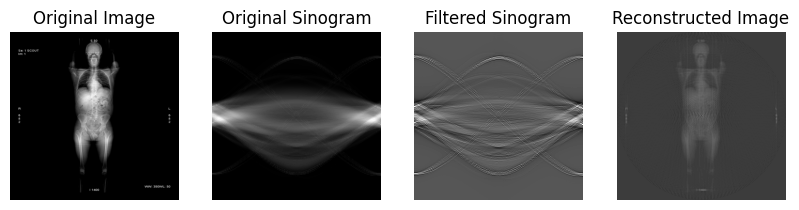

In [5]:

img, _ = CT(dcm.pixel_array, ANGLE_RANGE, N_SCANS, N_DETECTORS, filter=True, visualize=True, mask=False).scan()

In [6]:
widgets_id = widgets.IntText(description='Patient ID:', disabled=False)
widgets_name = widgets.Text(description='Patient Name:', disabled=False)
widgets_birth_date = widgets.DatePicker(description='Date:', disabled=False)
widgets_sex = widgets.ToggleButtons(options=['M', 'F'], disabled=False)
widgets_study_date = widgets.DatePicker(description='Date:', disabled=False)
widgets_comment = widgets.Textarea(description='Comment:', disabled=False)

def set_user_data(change):
    global PATIENT_ID, PATIENT_NAME, BIRTH_DATE, SEX, STUDY_DATE, COMMENT
    if change['owner'] == widgets_id:
        PATIENT_ID = change['new']
    elif change['owner'] == widgets_name:
        PATIENT_NAME = change['new']
    elif change['owner'] == widgets_birth_date:
        BIRTH_DATE = change['new']
    elif change['owner'] == widgets_sex:
        SEX = change['new']
    elif change['owner'] == widgets_study_date:
        STUDY_DATE = change['new']
    elif change['owner'] == widgets_comment:
        COMMENT = change['new']

#default values
PATIENT_ID, PATIENT_NAME, BIRTH_DATE, SEX, STUDY_DATE, COMMENT = '0', 'Patient Name', '01/01/2020', 'M', '01/01/2020', 'Comment'

widgets_id.observe(set_user_data, names='value')
widgets_name.observe(set_user_data, names='value')
widgets_birth_date.observe(set_user_data, names='value')
widgets_sex.observe(set_user_data, names='value')
widgets_study_date.observe(set_user_data, names='value')
widgets_comment.observe(set_user_data, names='value')

display(widgets_id, widgets_name, widgets_birth_date, widgets_sex, widgets_study_date, widgets_comment)

IntText(value=0, description='Patient ID:')

Text(value='', description='Patient Name:')

DatePicker(value=None, description='Date:', step=1)

ToggleButtons(options=('M', 'F'), value='M')

DatePicker(value=None, description='Date:', step=1)

Textarea(value='', description='Comment:')

In [7]:
metadata = {
        'PatientID': PATIENT_ID,
        'PatientName': PATIENT_NAME,
        'PatientBirthDate': BIRTH_DATE,
        'PatientSex': SEX,
        'StudyDate': STUDY_DATE,
        'ImageComments': COMMENT
}

write_dicom(img, metadata)

C:\Users\hudyw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pydicom\valuerep.py:443: UserWarning: Invalid value for VR DA: '01/01/2020'.
  warnings.warn(msg)


Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 206
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.826.0.1.3680043.8.498.63805261178727453851805698502392562090
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.826.0.1.3680043.8.498.1
(0002, 0013) Implementation Version Name         SH: 'PYDICOM 2.4.4'
-------------------------------------------------
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL']
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.826.0.1.3680043.8.498.63805261178727453851805698502392562090
(0008, 0020) Study Date                          DA: '01/01/2020'
(0008, 0060) Modality